In [92]:
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder,scale
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble importRandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,precision_recall_curve,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import pickle
%matplotlib inline
from matplotlib.pyplot import style
style.use("ggplot")

In [93]:
df_bid=pd.read_csv("bids.csv")

In [94]:
df_train=pd.read_csv("train.csv")

In [95]:
df_bid.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [96]:
df_train.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


In [97]:
df_merged=df_bid.merge(df_train,how='inner',left_on='bidder_id',right_on='bidder_id')

In [98]:
df_merged.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,payment_account,address,outcome
0,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0
1,25,668d393e858e8126275433046bbd35c6tywop,38v0a,furniture,phone4,9759243315789473,bd,147.64.206.30,vasstdc27m7nks3,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0
2,39,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone35,9759243368421052,in,75.11.239.20,i92xwb95qdo901j,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0
3,42,668d393e858e8126275433046bbd35c6tywop,jkyzt,furniture,phone38,9759243368421052,in,215.203.78.242,s4hrzaqd5vbq2he,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0
4,68,668d393e858e8126275433046bbd35c6tywop,h2xrf,furniture,phone57,9759243526315789,in,134.198.237.242,1euklxshlldto4z,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0


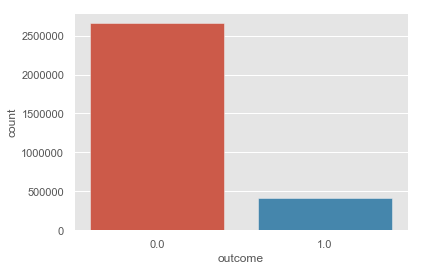

In [99]:
sns.countplot(x="outcome", data=df_merged)

In [100]:
df_merged.isnull().sum()

bid_id                0
bidder_id             0
auction               0
merchandise           0
device                0
time                  0
country            2701
ip                    0
url                   0
payment_account       0
address               0
outcome               0
dtype: int64

In [101]:
df_merged.dropna(inplace=True)

In [102]:
print(len(set(df_merged["bidder_id"])),len(set(df_merged["merchandise"])),len(set(df_merged["auction"])),
len(set(df_merged["country"])),len(set(df_merged["ip"])),len(set(df_merged["payment_account"])),len(set(df_merged["address"])),
     len(set(df_merged["url"])))

1983 10 12740 198 1028810 1983 1983 663265


In [103]:
len(df_merged)

3068523

In [104]:
df_merged["Data"]=df_merged["auction"]+" "+df_merged["merchandise"]+" "+df_merged["device"]+" "+df_merged["country"]
cv=CountVectorizer()
X_transformed=cv.fit_transform(df_merged["Data"])
featuremap=cv.get_feature_names()
len(featuremap)

18679

In [105]:
len(set(df_merged["device"]))

5726

In [106]:
df_merged.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,payment_account,address,outcome,Data
0,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0,aeqok furniture phone1 in
1,25,668d393e858e8126275433046bbd35c6tywop,38v0a,furniture,phone4,9759243315789473,bd,147.64.206.30,vasstdc27m7nks3,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0,38v0a furniture phone4 bd
2,39,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone35,9759243368421052,in,75.11.239.20,i92xwb95qdo901j,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0,aeqok furniture phone35 in
3,42,668d393e858e8126275433046bbd35c6tywop,jkyzt,furniture,phone38,9759243368421052,in,215.203.78.242,s4hrzaqd5vbq2he,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0,jkyzt furniture phone38 in
4,68,668d393e858e8126275433046bbd35c6tywop,h2xrf,furniture,phone57,9759243526315789,in,134.198.237.242,1euklxshlldto4z,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0,h2xrf furniture phone57 in


In [107]:
df_merged.dtypes

bid_id               int64
bidder_id           object
auction             object
merchandise         object
device              object
time                 int64
country             object
ip                  object
url                 object
payment_account     object
address             object
outcome            float64
Data                object
dtype: object

In [108]:
df=df_merged.groupby(['bidder_id']).agg(['count'])[["auction"]]

In [109]:
time=df_merged[["time","bidder_id"]].groupby(['bidder_id']).agg(['max',"min"])
df["time_diff"]=time["time"]["max"]-time["time"]["min"]
df.head()

,auction,time_diff
,count,
bidder_id,,
001068c415025a009fee375a12cff4fcnht8y,1,0
0030a2dd87ad2733e0873062e4f83954mkj86,1,0
00a0517965f18610417ee784a05f494d4dw6e,141,76815631578947
00cc97158e6f4cb8eac3c0075918b7ffi5k8o,3,54968000000000
01067975436d123f717ee5aba0dd4bbfa0937,534,13589473684211


In [110]:
df1 = df_merged.groupby(["bidder_id"])[["country",'auction',"device","merchandise","ip","url","payment_account",
                                       "address"]].nunique()

In [111]:
df1.head()

,country,auction,device,merchandise,ip,url,payment_account,address
bidder_id,,,,,,,,
001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1,1,1
0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,1,1,1
00a0517965f18610417ee784a05f494d4dw6e,16,74,67,1,103,84,1,1
00cc97158e6f4cb8eac3c0075918b7ffi5k8o,2,3,3,1,3,1,1,1
01067975436d123f717ee5aba0dd4bbfa0937,71,17,164,1,389,4,1,1


In [112]:
df1["time_difference"]=df["time_diff"]
df1["count"]=df["auction"]["count"]

In [113]:
df1.head()

,country,auction,device,merchandise,ip,url,payment_account,address,time_difference,count
bidder_id,,,,,,,,,,
001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1,1,1,0,1
0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,1,1,1,0,1
00a0517965f18610417ee784a05f494d4dw6e,16,74,67,1,103,84,1,1,76815631578947,141
00cc97158e6f4cb8eac3c0075918b7ffi5k8o,2,3,3,1,3,1,1,1,54968000000000,3
01067975436d123f717ee5aba0dd4bbfa0937,71,17,164,1,389,4,1,1,13589473684211,534


In [114]:
df_merged1=df1.merge(df_merged,how='inner',left_index=True,right_on='bidder_id')
df = df_merged1.drop_duplicates(subset=['bidder_id'])
df.columns

Index(['country_x', 'auction_x', 'device_x', 'merchandise_x', 'ip_x', 'url_x',
       'payment_account_x', 'address_x', 'time_difference', 'count', 'bid_id',
       'bidder_id', 'auction_y', 'merchandise_y', 'device_y', 'time',
       'country_y', 'ip_y', 'url_y', 'payment_account_y', 'address_y',
       'outcome', 'Data'],
      dtype='object')

In [115]:
df=df[['country_x', 'auction_x', 'device_x', 'merchandise_x', 'ip_x', 'url_x',
        'payment_account_x', 'address_x', 'time_difference', 'count',"outcome","bidder_id"]]
df.set_index("bidder_id",inplace=True)
df.head()

,country_x,auction_x,device_x,merchandise_x,ip_x,url_x,payment_account_x,address_x,time_difference,count,outcome
bidder_id,,,,,,,,,,,
001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1,1,1,0,1,0.0
0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,1,1,1,0,1,0.0
00a0517965f18610417ee784a05f494d4dw6e,16,74,67,1,103,84,1,1,76815631578947,141,0.0
00cc97158e6f4cb8eac3c0075918b7ffi5k8o,2,3,3,1,3,1,1,1,54968000000000,3,0.0
01067975436d123f717ee5aba0dd4bbfa0937,71,17,164,1,389,4,1,1,13589473684211,534,0.0


In [116]:
df.dtypes


country_x              int64
auction_x              int64
device_x               int64
merchandise_x          int64
ip_x                   int64
url_x                  int64
payment_account_x      int64
address_x              int64
time_difference        int64
count                  int64
outcome              float64
dtype: object

C:\Users\MMOHTASHIM\Anaconda3\envs\env_full\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\MMOHTASHIM\Anaconda3\envs\env_full\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


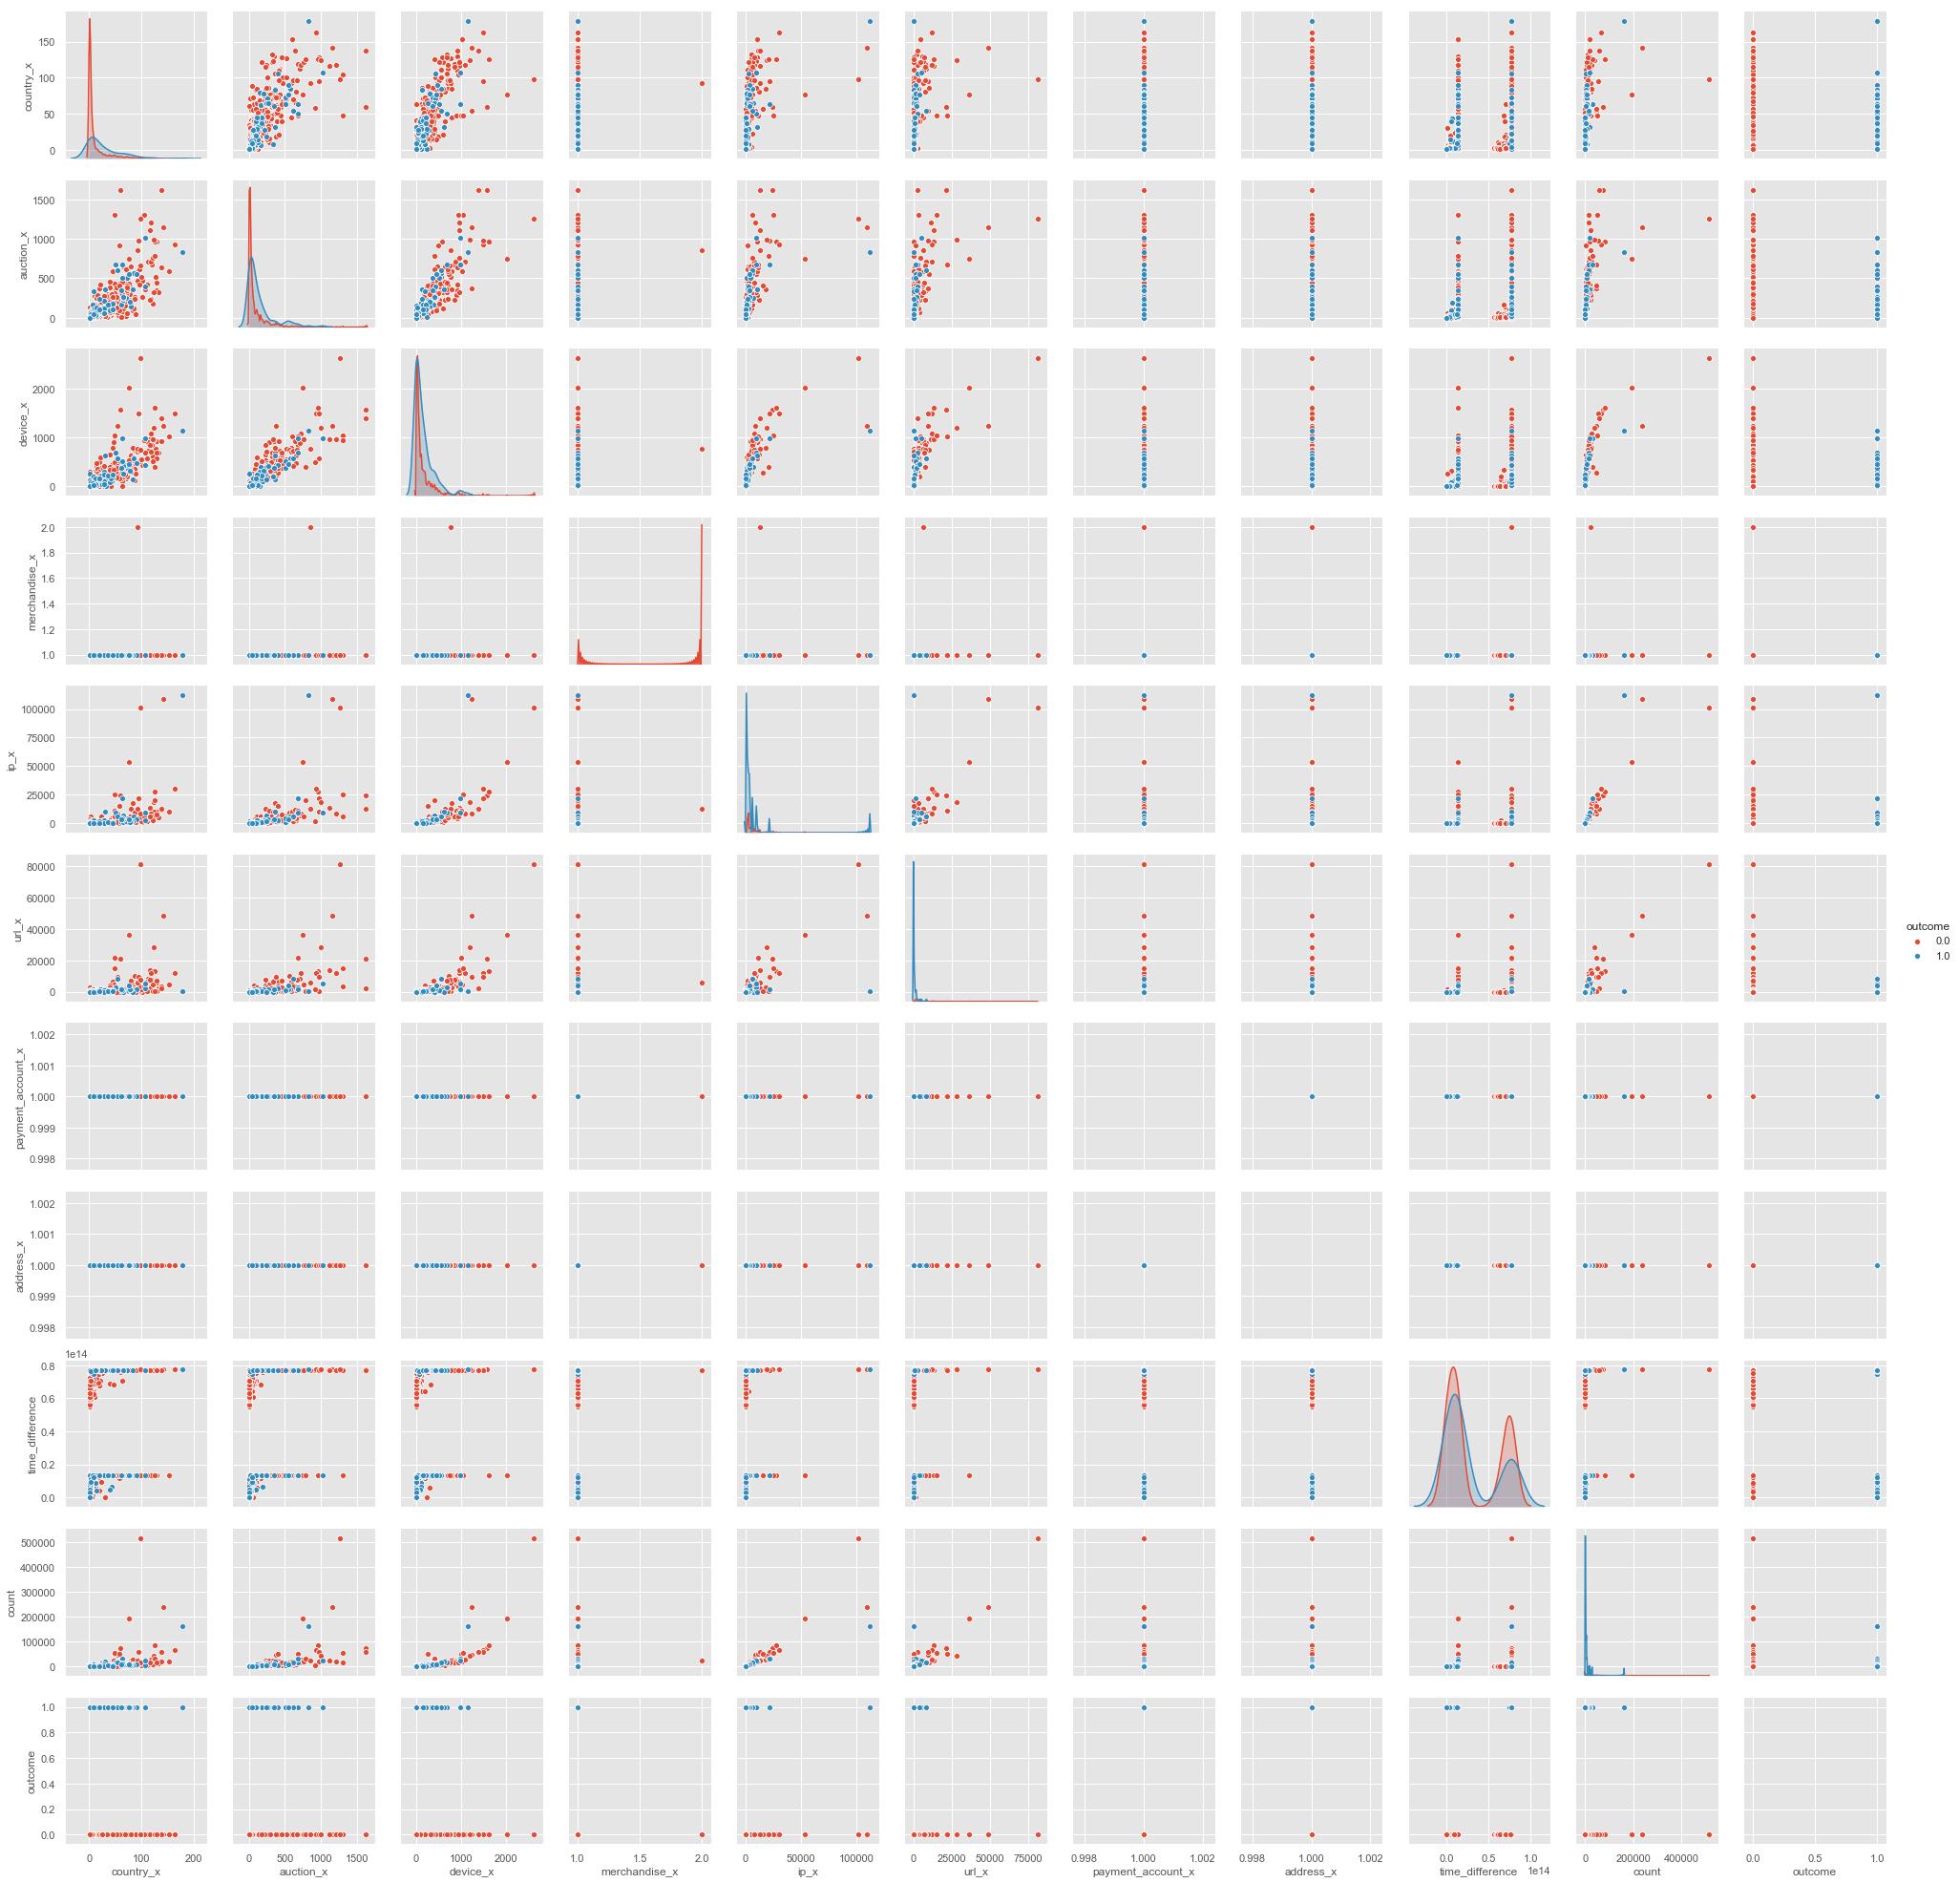

In [117]:
import seaborn as sns
sns.pairplot(df, hue="outcome")

In [118]:
X=df.drop("outcome",1)
y=df["outcome"]

In [119]:
def Machine_learning_model(clf,X,y):
        Name=str(clf)
        X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33,random_state=42)
        clf.fit(X_train,y_train)
        
        with open('{}.pkl'.format(Name[:20]), 'wb') as fid:
            pickle.dump(clf, fid)  
        
        y_train_scores=clf.predict_proba(X_train)[:,1]
        y_test_scores=clf.predict_proba(X_test)[:,1]
        fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_scores)
        fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_scores)
        
        fig1=plt.figure()
        ax1=fig1.add_subplot(111)
        ax1.plot(fpr_train,tpr_train)
        ax1.plot([0,1],[0,1],linestyle='dashed')
        ax1.set_title("ROC Curve--Train for {}".format(Name[:20]))
        ax1.set_xticks([],[])
        ax1.set_ylabel("True Positive Rate")
        
        fig2=plt.figure()
        ax2=fig2.add_subplot(111)
        ax2.plot([0,1],[0,1],linestyle='dashed')
        ax2.plot(fpr_train,tpr_train,color="green")
        ax2.set_title("ROC Curve--Test for {}".format(Name[:20]))
        ax2.set_xlabel("False Positive Rate")
        ax2.set_ylabel("True Positive Rate")
        
        print("The  mean anomaly score(Train)  for {} is:".format(Name[:20]),clf.score(X_train,y_train))
        print("The  mean anomaly score(Test)  for {} is:".format(Name[:20]),clf.score(X_test,y_test))
        ###threshold graph:
        probs=clf.predict_proba(X)[:,1]
        df=pd.DataFrame()
        df["thresholds"]=probs
        df["actual_labels"]=y
        accuracy=[]
        threshold=np.arange(0.1,1,.1).tolist()
        for i in threshold:
            df["predicted_labels"]=np.where(df["thresholds"]>=i,1,0)
            df["Correct"]=df["actual_labels"]==df["predicted_labels"]
            correct=len(df[(df["Correct"]==True)])
            accuracy.append(correct/len(df))
        precisions, recalls, thresholds = precision_recall_curve(y, probs)
        
        fig3=plt.figure()
        ax3=fig3.add_subplot(111)
        ax3.plot(thresholds, precisions[:-1], 'b--', label='precision')
        ax3.plot(threshold, accuracy, 'g--', label = 'accuracy')
        ax3.set_xlabel('Threshold')
        ax3.legend(loc='upper left')
        ax3.set_ylim([0,1])
        
        ###confusion matrix
        y_pred=clf.predict(X)
        print("OverAll Confusion Matrix for {}".format(Name[:20]))
        print(confusion_matrix(y, y_pred))
        

C:\Users\MMOHTASHIM\Anaconda3\envs\env_full\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The  mean anomaly score(Train)  for RandomForestClassifi is: 0.9909638554216867
The  mean anomaly score(Test)  for RandomForestClassifi is: 0.9480916030534351
OverAll Confusion Matrix for RandomForestClassifi
[[1876    4]
 [  42   61]]


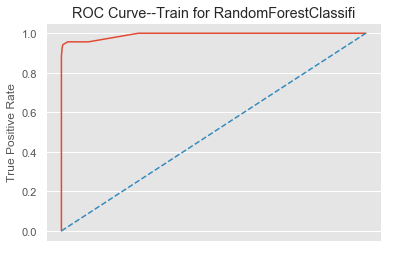

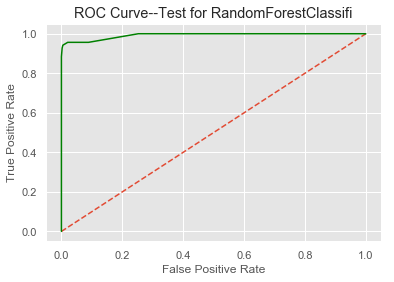

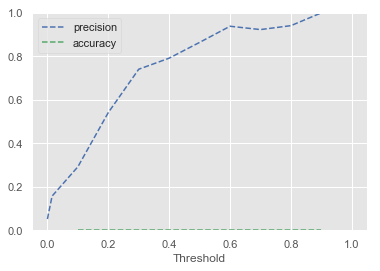

In [121]:
Machine_learning_model(RandomForestClassifier(),X,y)

The  mean anomaly score(Train)  for GradientBoostingClas is: 0.990210843373494
The  mean anomaly score(Test)  for GradientBoostingClas is: 0.9541984732824428
OverAll Confusion Matrix for GradientBoostingClas
[[1870   10]
 [  33   70]]


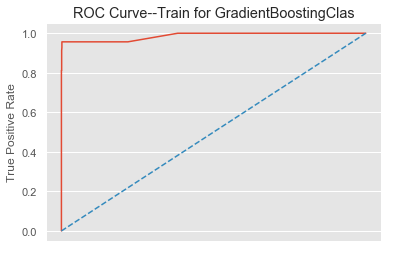

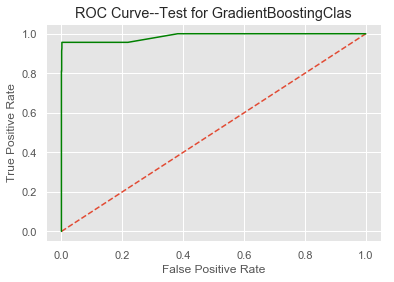

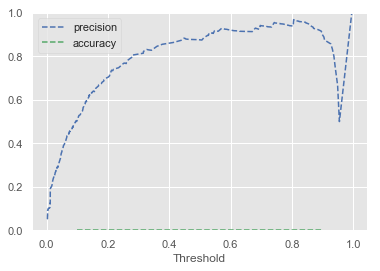

In [122]:
Machine_learning_model(GradientBoostingClassifier(),X,y)

The  mean anomaly score(Train)  for KNeighborsClassifier is: 0.9495481927710844
The  mean anomaly score(Test)  for KNeighborsClassifier is: 0.9435114503816794
OverAll Confusion Matrix for KNeighborsClassifier
[[1875    5]
 [  99    4]]


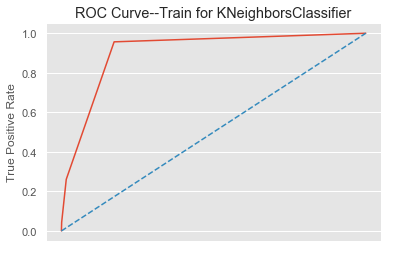

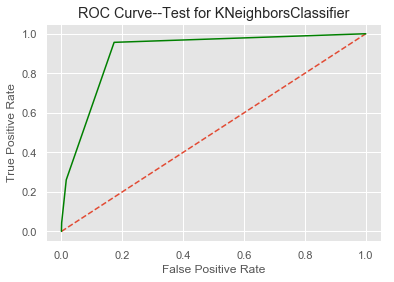

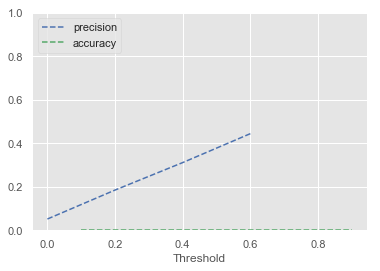

In [125]:
Machine_learning_model(KNeighborsClassifier(),X,y)

C:\Users\MMOHTASHIM\Anaconda3\envs\env_full\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The  mean anomaly score(Train)  for LogisticRegression(C is: 0.7951807228915663
The  mean anomaly score(Test)  for LogisticRegression(C is: 0.8122137404580153
OverAll Confusion Matrix for LogisticRegression(C
[[1583  297]
 [  98    5]]


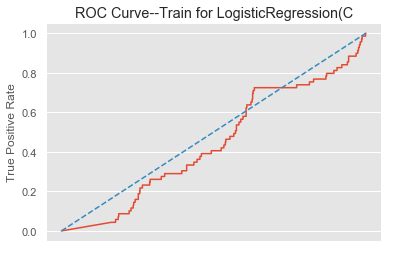

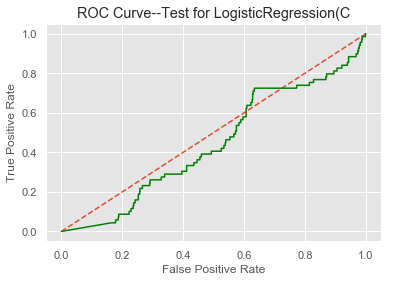

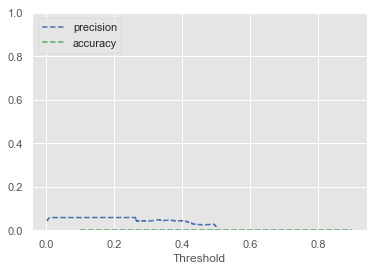

In [124]:
Machine_learning_model(LogisticRegression(),X,y)

The  mean anomaly score(Train)  for MultinomialNB(alpha= is: 0.7356927710843374
The  mean anomaly score(Test)  for MultinomialNB(alpha= is: 0.7465648854961832
OverAll Confusion Matrix for MultinomialNB(alpha=
[[1428  452]
 [  65   38]]


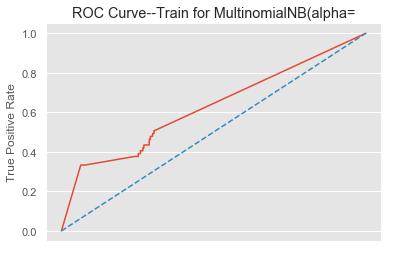

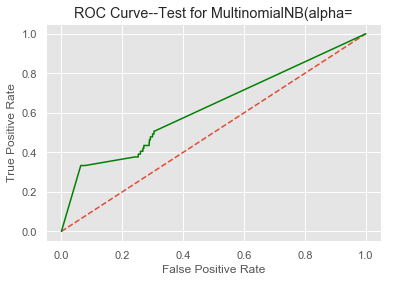

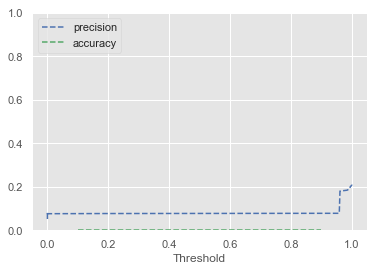

In [155]:
Machine_learning_model(MultinomialNB(),X,y)

In [126]:
X.shape,np.array(y).shape

((1983, 10), (1983,))

Train on 1328 samples, validate on 1328 samples
Epoch 1/20
1328/1328 [==============================] - ETA: 11s - loss: 1641626468352.0000 - accuracy: 0.593 - ETA: 0s - loss: 452735290919.3981 - accuracy: 0.8894  - ETA: 0s - loss: 355886196023.6598 - accuracy: 0.909 - ETA: 0s - loss: 281339154912.0073 - accuracy: 0.913 - ETA: 0s - loss: 240103874185.3716 - accuracy: 0.915 - 1s 827us/sample - loss: 237223159437.8852 - accuracy: 0.9157 - val_loss: 87399108209.3532 - val_accuracy: 0.9480
Epoch 2/20
1328/1328 [==============================] - ETA: 0s - loss: 114883723264.0000 - accuracy: 0.906 - ETA: 0s - loss: 78705692032.0022 - accuracy: 0.921 - ETA: 0s - loss: 80020099628.5229 - accuracy: 0.90 - ETA: 0s - loss: 80946587840.0008 - accuracy: 0.91 - 1s 385us/sample - loss: 103900645968.1935 - accuracy: 0.9164 - val_loss: 34268013397.1814 - val_accuracy: 0.9480
Epoch 3/20
1328/1328 [==============================] - ETA: 0s - loss: 216165122048.0000 - accuracy: 0.812 - ETA: 0s - loss: 799

C:\Users\MMOHTASHIM\Anaconda3\envs\env_full\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


(0, 1)

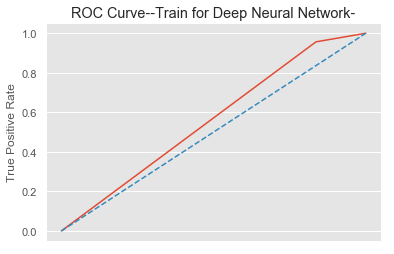

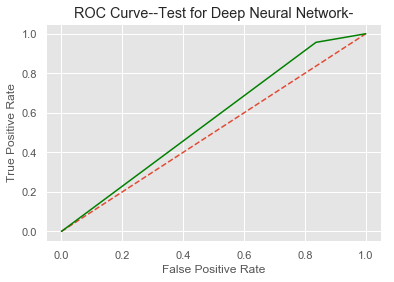

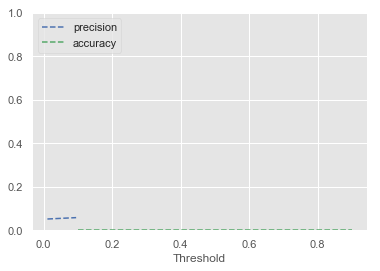

<Figure size 432x288 with 0 Axes>

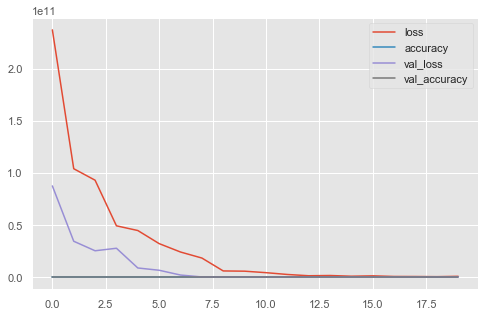

In [128]:
import tensorflow as tf
Name="Deep Neural Network-11111"
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33,random_state=42)
X_valid,y_valid=X_train[:50000],y_train[:50000]
clf = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(10,)),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(2, activation='softmax')])

clf.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True)
history = clf.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid),callbacks=[checkpoint_cb])
    
y_train_scores=clf.predict_proba(X_train)[:,1]
y_test_scores=clf.predict_proba(X_test)[:,1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_scores)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_scores)

fig1=plt.figure()
ax1=fig1.add_subplot(111)
ax1.plot(fpr_train,tpr_train)
ax1.plot([0,1],[0,1],linestyle='dashed')
ax1.set_title("ROC Curve--Train for {}".format(Name[:20]))
ax1.set_xticks([],[])
ax1.set_ylabel("True Positive Rate")
        
fig2=plt.figure()
ax2=fig2.add_subplot(111)
ax2.plot([0,1],[0,1],linestyle='dashed')
ax2.plot(fpr_train,tpr_train,color="green")
ax2.set_title("ROC Curve--Test for {}".format(Name[:20]))
ax2.set_xlabel("False Positive Rate")
ax2.set_ylabel("True Positive Rate")
        
print("The  mean score(Test,Train)  for {} is:".format(Name[:20]), clf.evaluate(X_train, y_train))
###threshold graph:
probs=clf.predict_proba(X)[:,1]
df=pd.DataFrame()
df["thresholds"]=probs
df["actual_labels"]=y
accuracy=[]
threshold=np.arange(0.1,1,.1).tolist()
for i in threshold:
    df["predicted_labels"]=np.where(df["thresholds"]>=i,1,0)
    df["Correct"]=df["actual_labels"]==df["predicted_labels"]
    correct=len(df[(df["Correct"]==True)])
    accuracy.append(correct/len(df))
precisions, recalls, thresholds = precision_recall_curve(y, probs)
        
fig3=plt.figure()
ax3=fig3.add_subplot(111)
ax3.plot(thresholds, precisions[:-1], 'b--', label='precision')
ax3.plot(threshold, accuracy, 'g--', label = 'accuracy')
ax3.set_xlabel('Threshold')
ax3.legend(loc='upper left')
ax3.set_ylim([0,1])
        
###confusion matrix
y_pred=clf.predict_classes(X)
print("OverAll Confusion Matrix for {}".format(Name[:20]))
print(confusion_matrix(y, y_pred))
    
fig4=plt.figure()
ax4=fig3.add_subplot(111)
pd.DataFrame(history.history).plot(figsize=(8, 5))
ax4.grid(True)
ax4.set_ylim(0, 1) # set the vertical range to [0-1]


In [132]:
df_test=pd.read_csv("test.csv")

In [133]:
df_merged_test=df_bid.merge(df_test,how='inner',left_on='bidder_id',right_on='bidder_id')

In [134]:
#trainning model pipeline
df_test=df_merged_test.groupby(['bidder_id']).agg(['count'])[["auction"]]

time=df_merged_test[["time","bidder_id"]].groupby(['bidder_id']).agg(['max',"min"])
df_test["time_diff"]=time["time"]["max"]-time["time"]["min"]
df1 = df_merged_test.groupby(["bidder_id"])[["country",'auction',"device","merchandise","ip","url","payment_account",
                                       "address"]].nunique()

df1["time_difference"]=df_test["time_diff"]
df1["count"]=df_test["auction"]["count"]

df_merged1=df1.merge(df_merged_test,how='inner',left_index=True,right_on='bidder_id')
df= df_merged1.drop_duplicates(subset=['bidder_id'])

df=df[['country_x', 'auction_x', 'device_x', 'merchandise_x', 'ip_x', 'url_x',
        'payment_account_x', 'address_x', 'time_difference', 'count',"bidder_id"]]
df.set_index("bidder_id",inplace=True)
df.head()

,country_x,auction_x,device_x,merchandise_x,ip_x,url_x,payment_account_x,address_x,time_difference,count
bidder_id,,,,,,,,,,
002d229ffb247009810828f648afc2ef593rb,1,1,2,1,1,1,1,1,105263158,2
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1,3,3,1,3,2,1,1,65955684210526,3
00486a11dff552c4bd7696265724ff81yeo9v,1,13,8,1,10,7,1,1,76349842105263,20
0051aef3fdeacdadba664b9b3b07e04e4coc6,4,5,6,1,10,3,1,1,10955210526316,68
0053b78cde37c4384a20d2da9aa4272aym4pb,73,408,518,1,1951,1937,1,1,77280421052631,10939


In [135]:
df_merged_test.isnull().sum()

bid_id                0
bidder_id             0
auction               0
merchandise           0
device                0
time                  0
country            6158
ip                    0
url                   0
payment_account       0
address               0
dtype: int64

In [136]:
df_merged_test.dropna(inplace=True)

In [ ]:
print(len(set(df_merged_test["bidder_id"])),len(set(df_merged_test["merchandise"])),len(set(df_merged_test["auction"])),
len(set(df_merged_test["country"])),len(set(df_merged_test["ip"])),len(set(df_merged_test["payment_account"])),len(set(df_merged_test["address"])),
     len(set(df_merged_test["url"])))

In [137]:
len(df)

4630

In [138]:
df.dtypes

country_x            int64
auction_x            int64
device_x             int64
merchandise_x        int64
ip_x                 int64
url_x                int64
payment_account_x    int64
address_x            int64
time_difference      int64
count                int64
dtype: object

In [139]:
model =loaded_model = pickle.load(open("GradientBoostingClas.pkl", 'rb'))
pred=model.predict(df)

In [145]:
df["Outcome"]=pred        

In [146]:
df.head()

,country_x,auction_x,device_x,merchandise_x,ip_x,url_x,payment_account_x,address_x,time_difference,count,Outcome
bidder_id,,,,,,,,,,,
002d229ffb247009810828f648afc2ef593rb,1,1,2,1,1,1,1,1,105263158,2,0.0
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1,3,3,1,3,2,1,1,65955684210526,3,0.0
00486a11dff552c4bd7696265724ff81yeo9v,1,13,8,1,10,7,1,1,76349842105263,20,0.0
0051aef3fdeacdadba664b9b3b07e04e4coc6,4,5,6,1,10,3,1,1,10955210526316,68,0.0
0053b78cde37c4384a20d2da9aa4272aym4pb,73,408,518,1,1951,1937,1,1,77280421052631,10939,0.0


In [150]:
df_sub=df.merge(df_merged_test,how='inner',left_index=True,right_on='bidder_id')

In [151]:
df_sub=df_sub[["bidder_id","Outcome"]]
df_sub.to_csv("sub.csv")

In [154]:
set(df_sub[(df_sub["Outcome"]==1)]['bidder_id'])##Bots identified among the stream of human transcation

{'00a79ebd15f0b24a0a3b5794457cd8ed7dng1',
 '05ce81fa868e12e99ab0390d9579747b0tntg',
 '06cb735854688d6d03c39fe1f8fe84563y4m1',
 '071300a7c3385788c00573d1c4bf150csf3cg',
 '08fdd6af0ffe017623d5dd2f3b509f598dk01',
 '092ceb77862ed0c120af013fe90093e64qknp',
 '1096778aca48c41c8d0e288804d5e4e128pco',
 '1110df63854d2978e639dfb6a0f3ac082gred',
 '11f93b9d507b8ed90e9d0856306b1962afr6j',
 '12697ca1ff07c09bccd30c211c6e52c31erih',
 '1d56d57ff15fb662bb4f722d96a5f77f73smx',
 '21b9c0aeb6ed37736d266482b7994af95x9wm',
 '22542025efbe1f2f83a73161bf4049edg6wn3',
 '284a35aa14a3ee8939e1c5243acfa9a8e8u7h',
 '295ed5748f1eae8df0a505c56c9966878bp67',
 '2d2db55774fd1414345f7e5b1563693clz49m',
 '2e73e3807ba52966ed442c7eb3f731d62bs16',
 '30ca34e8886bb4de657137bcba23428ct8fqx',
 '38993a59097048fc000c1592a8ffcb30uobkf',
 '3f1851c084902648ace66c99d0f781d80dk1b',
 '3ff85cc36b9f14e6e9c6ea216588c8fcdy4qu',
 '46ab934cc91ae035935ce692c7cdf978muere',
 '4a9b8b8645b60559f30c00e4cc13165d39url',
 '4c12adca204268a58e46a05fe5d9d006